In [84]:
import logging
import os
from pathlib import Path
import re
import json
from typing import Any
from pydantic import BaseModel
from scipy.stats import gaussian_kde
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import dask
dask.config.set({'dataframe.query-planning': True})
import dask.dataframe as dd
from visualization.plot_experiments_result import read_data_to_df

from visualization.plot_experiments_result import makespan_histogram_pd

In [2]:
experiments_path = Path("~/sched_exps/base_sched").expanduser()

In [3]:
cases = [1, 2, 3, 4, 5, 6]
methods = ['overlapschedule', 'randomallocation', 'maxduration']

In [4]:
df = read_data_to_df(experiments_path.glob("*.json"), cols={"initial_makespan": -1, "final_makespan": -1,  "FAIL": False})

In [87]:
dask_df = dd.from_pandas(df, chunksize=10000)

In [5]:
df[df["FAIL"]==True]

,case_number,schedule_seed,dist_seed,sim_seed,answer_seed,method_name,det_job,initial_makespan,final_makespan,FAIL


In [13]:
df1 = df[df["case_number"] == 4][df["sim_seed"] == 0][df["schedule_seed"] == 0][df['method_name'] == 'overlapschedule'][df['dist_seed'] == 0][df['det_job'] == True][df["FAIL"] == False]

/tmp/ipykernel_62603/2133341223.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["case_number"] == 4][df["sim_seed"] == 0][df["schedule_seed"] == 0][df['method_name'] == 'overlapschedule'][df['dist_seed'] == 0][df['det_job'] == True][df["FAIL"] == False]
/tmp/ipykernel_62603/2133341223.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["case_number"] == 4][df["sim_seed"] == 0][df["schedule_seed"] == 0][df['method_name'] == 'overlapschedule'][df['dist_seed'] == 0][df['det_job'] == True][df["FAIL"] == False]
/tmp/ipykernel_62603/2133341223.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["case_number"] == 4][df["sim_seed"] == 0][df["schedule_seed"] == 0][df['method_name'] == 'overlapschedule'][df['dist_seed'] == 0][df['det_job'] == True][df["FAIL"] == False]
/tmp/ipykernel_62603/2133341223.py:1: UserWarning: Boolean Series key will be reindexed to mat

In [6]:
df1 = df[df["case_number"] == 4][df["dist_seed"] == df["schedule_seed"]][df['method_name'] == 'overlapschedule'][df['det_job'] == True][df["FAIL"] == False]

/tmp/ipykernel_11081/3121037130.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["case_number"] == 4][df["dist_seed"] == df["schedule_seed"]][df['method_name'] == 'overlapschedule'][df['det_job'] == True][df["FAIL"] == False]
/tmp/ipykernel_11081/3121037130.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["case_number"] == 4][df["dist_seed"] == df["schedule_seed"]][df['method_name'] == 'overlapschedule'][df['det_job'] == True][df["FAIL"] == False]
/tmp/ipykernel_11081/3121037130.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["case_number"] == 4][df["dist_seed"] == df["schedule_seed"]][df['method_name'] == 'overlapschedule'][df['det_job'] == True][df["FAIL"] == False]
/tmp/ipykernel_11081/3121037130.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["case_number"] == 4][df["dist_seed"] == df["schedule_

In [7]:
df1

,case_number,schedule_seed,dist_seed,sim_seed,answer_seed,method_name,det_job,initial_makespan,final_makespan,FAIL
429,4,3,3,0,0,overlapschedule,True,215.0,163,False
983,4,7,7,0,0,overlapschedule,True,183.0,165,False
2250,4,1,1,0,0,overlapschedule,True,193.0,179,False
3302,4,4,4,0,0,overlapschedule,True,161.0,190,False
12352,4,0,0,0,0,overlapschedule,True,179.0,179,False
15833,4,9,9,0,0,overlapschedule,True,150.0,175,False
19500,4,6,6,0,0,overlapschedule,True,165.0,198,False
25601,4,8,8,0,0,overlapschedule,True,151.0,175,False
26852,4,5,5,0,0,overlapschedule,True,131.0,185,False
35785,4,2,2,0,0,overlapschedule,True,172.0,199,False


In [14]:
folder_path = os.path.join(experiments_path, 'base_sched/')
extracted_files = os.listdir(folder_path)
extracted_files = [Path(folder_path+file) for file in extracted_files if '.json' in file and '.ipynb' not in file]
df = read_data_to_df(extracted_files, {"makespan": -1, "FAIL": False})

Expecting ',' delimiter: line 1 column 7166 (char 7165)
/home/behrejan/repos/rss24_sched/scheduling/src/exp_scripts/experiments/base_sched/sched_case_3_method_maxduration_dist_seed_3_schedule_seed_20_sim_seed_0_det_job_False_answer_seed_0.json


In [8]:
df1 = df[df["FAIL"] == False][df["case_number"] == 4][df["sim_seed"] == 0][
                df["schedule_seed"] == 0][df['method_name'] == 'overlapschedule'][df['dist_seed'] == 0][df['det_job'] == True]

/tmp/ipykernel_11081/1633640756.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["case_number"] == 4][df["sim_seed"] == 0][
/tmp/ipykernel_11081/1633640756.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["case_number"] == 4][df["sim_seed"] == 0][
/tmp/ipykernel_11081/1633640756.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["case_number"] == 4][df["sim_seed"] == 0][
/tmp/ipykernel_11081/1633640756.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["case_number"] == 4][df["sim_seed"] == 0][
/tmp/ipykernel_11081/1633640756.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["case_number"] == 4][df["sim_seed"] == 0][


In [9]:
df1

,case_number,schedule_seed,dist_seed,sim_seed,answer_seed,method_name,det_job,initial_makespan,final_makespan,FAIL
12352,4,0,0,0,0,overlapschedule,True,179.0,179,False


In [16]:
df1 = df[df["FAIL"] == False][df["sim_seed"] == 0][
                df["schedule_seed"] == 0][df['method_name'] == 'overlapschedule'][df['det_job'] == True][df['initial_makespan'] <= df['final_makespan']]
df1

/tmp/ipykernel_11081/2844780776.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["sim_seed"] == 0][
/tmp/ipykernel_11081/2844780776.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["sim_seed"] == 0][
/tmp/ipykernel_11081/2844780776.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["sim_seed"] == 0][


,case_number,schedule_seed,dist_seed,sim_seed,answer_seed,method_name,det_job,initial_makespan,final_makespan,FAIL
365,5,0,8,0,0,overlapschedule,True,156.0,167,False
651,3,0,2,0,0,overlapschedule,True,163.0,163,False
1318,4,0,1,0,0,overlapschedule,True,167.0,185,False
1639,4,0,2,0,0,overlapschedule,True,181.0,189,False
1865,4,0,9,0,0,overlapschedule,True,153.0,171,False
4232,1,0,0,0,0,overlapschedule,True,204.0,204,False
5518,6,0,7,0,0,overlapschedule,True,152.0,152,False
6174,1,0,8,0,0,overlapschedule,True,172.0,179,False
9628,1,0,1,0,0,overlapschedule,True,198.0,200,False
10104,5,0,4,0,0,overlapschedule,True,157.0,164,False


In [36]:
df_case4_opt = df[df["FAIL"] == False][df['method_name'] == 'overlapschedule'][df['det_job'] == True][df["case_number"] == 4][df["sim_seed"] == df["schedule_seed"]]
df_case4_opt

/tmp/ipykernel_11081/1439869625.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_case4_opt = df[df["FAIL"] == False][df['method_name'] == 'overlapschedule'][df['det_job'] == True][df["case_number"] == 4][df["sim_seed"] == df["schedule_seed"]]
/tmp/ipykernel_11081/1439869625.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_case4_opt = df[df["FAIL"] == False][df['method_name'] == 'overlapschedule'][df['det_job'] == True][df["case_number"] == 4][df["sim_seed"] == df["schedule_seed"]]
/tmp/ipykernel_11081/1439869625.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_case4_opt = df[df["FAIL"] == False][df['method_name'] == 'overlapschedule'][df['det_job'] == True][df["case_number"] == 4][df["sim_seed"] == df["schedule_seed"]]


,case_number,schedule_seed,dist_seed,sim_seed,answer_seed,method_name,det_job,initial_makespan,final_makespan,FAIL
1318,4,0,1,0,0,overlapschedule,True,167.0,185,False
1639,4,0,2,0,0,overlapschedule,True,181.0,189,False
1865,4,0,9,0,0,overlapschedule,True,153.0,171,False
11609,4,0,3,0,0,overlapschedule,True,152.0,171,False
12352,4,0,0,0,0,overlapschedule,True,179.0,179,False
16271,4,0,5,0,0,overlapschedule,True,167.0,182,False
16301,4,0,6,0,0,overlapschedule,True,154.0,159,False
23407,4,0,4,0,0,overlapschedule,True,155.0,176,False
32193,4,0,8,0,0,overlapschedule,True,156.0,158,False
33654,4,0,7,0,0,overlapschedule,True,151.0,155,False


In [91]:
row = df.iloc[1]

def makespan_lb(row: pd.Series) -> float:
    return min(df["initial_makespan"][df["det_job"]==True][df["method_name"]=="overlapschedule"][df["dist_seed"] == row["dist_seed"]][df["case_number"] == row["case_number"]])

# makespan_lb(row=row)
ms_lb = dask_df.apply(makespan_lb, axis=1)

# df["initial_makespan"][df["method_name"] == "overlapschedule"][df["case_number"]]

/home/behrejan/miniconda3/envs/msched/lib/python3.10/site-packages/dask/dataframe/core.py:6280: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=(None, 'float64'))

  )


In [92]:
ms_lb.compute()

0        119.0
1        141.0
2        145.0
3        131.0
4        133.0
         ...  
35995    129.0
35996    145.0
35997    169.0
35998    113.0
35999    135.0
Length: 36000, dtype: float64

In [117]:
df_one_exp = df[df["det_job"] == True][df["case_number"] == 5][df["dist_seed"]==5][df["method_name"]=="overlapschedule"]
ms_lb = min(df_one_exp["initial_makespan"][df_one_exp["sim_seed"]==df_one_exp["schedule_seed"]])

ms_norm = np.array(df_one_exp["final_makespan"] / ms_lb)

/tmp/ipykernel_11081/730936227.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_one_exp = df[df["det_job"] == True][df["case_number"] == 5][df["dist_seed"]==5][df["method_name"]=="overlapschedule"]
/tmp/ipykernel_11081/730936227.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_one_exp = df[df["det_job"] == True][df["case_number"] == 5][df["dist_seed"]==5][df["method_name"]=="overlapschedule"]
/tmp/ipykernel_11081/730936227.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_one_exp = df[df["det_job"] == True][df["case_number"] == 5][df["dist_seed"]==5][df["method_name"]=="overlapschedule"]


In [121]:
df_one_exp[df_one_exp["sim_seed"]==df_one_exp["schedule_seed"]]

,case_number,schedule_seed,dist_seed,sim_seed,answer_seed,method_name,det_job,initial_makespan,final_makespan,FAIL,makespan_lb
17413,5,0,5,0,0,overlapschedule,True,171.0,188,False,126.0


In [125]:
ms_norm

array([1.11111111, 1.23391813, 1.15789474, 1.16374269, 1.0877193 ,
       1.25730994, 1.25730994, 1.26900585, 1.30409357, 1.14619883,
       1.08187135, 1.26900585, 1.24561404, 1.12280702, 1.1754386 ,
       1.12865497, 1.1754386 , 1.1871345 , 1.21052632, 1.25146199,
       1.14619883, 1.39181287, 1.26315789, 1.26900585, 1.20467836,
       1.18128655, 1.14619883, 1.16374269, 1.24561404, 1.0877193 ,
       1.13450292, 1.25146199, 1.19883041, 1.10526316, 1.16959064,
       1.14619883, 1.0994152 , 1.23976608, 1.31578947, 1.1754386 ,
       1.21052632, 1.16959064, 1.1871345 , 1.15789474, 1.15789474,
       1.28070175, 1.19298246, 1.26900585, 1.16959064, 1.24561404,
       1.28070175, 1.06432749, 1.07017544, 1.23391813, 1.1754386 ,
       1.21637427, 1.19298246, 1.20467836, 1.15789474, 1.16374269,
       1.1754386 , 1.12865497, 1.14619883, 1.16959064, 1.18128655,
       1.24561404, 1.18128655, 1.09356725, 1.30409357, 1.16374269,
       1.1754386 , 1.23391813, 1.19883041, 1.21637427, 1.16374

In [99]:
df[df["initial_makespan"] > df["final_makespan"]][df["det_job"] == True]

/tmp/ipykernel_11081/1167385483.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["initial_makespan"] > df["final_makespan"]][df["det_job"] == True]


,case_number,schedule_seed,dist_seed,sim_seed,answer_seed,method_name,det_job,initial_makespan,final_makespan,FAIL,makespan_lb
5,2,55,8,0,0,overlapschedule,True,194.0,178,False,144.0
18,5,12,7,0,0,overlapschedule,True,168.0,165,False,129.0
42,2,85,6,0,0,overlapschedule,True,179.0,174,False,135.0
69,3,84,2,0,0,overlapschedule,True,188.0,184,False,140.0
96,2,7,7,0,0,overlapschedule,True,222.0,207,False,147.0
...,...,...,...,...,...,...,...,...,...,...,...
35798,5,44,3,0,0,overlapschedule,True,262.0,160,False,139.0
35830,1,19,9,0,0,overlapschedule,True,193.0,156,False,129.0
35882,4,89,1,0,0,overlapschedule,True,194.0,176,False,144.0
35887,1,66,6,0,0,overlapschedule,True,174.0,170,False,135.0


In [80]:
min(df["final_makespan"] / df["makespan_lb"])

1.0782122905027933

In [65]:
row

case_number                        1
schedule_seed                     70
dist_seed                          3
sim_seed                           0
answer_seed                        0
method_name         randomallocation
det_job                        False
initial_makespan                 NaN
final_makespan                   208
FAIL                           False
Name: 1, dtype: object

In [39]:

df_case4 = df[df["FAIL"] == False][df['method_name'] == 'overlapschedule'][df['det_job'] == True][df["case_number"] == 4]

df_case4["makespan_ref"] 

/tmp/ipykernel_11081/2092953593.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_case4 = df[df["FAIL"] == False][df['method_name'] == 'overlapschedule'][df['det_job'] == True][df["case_number"] == 4]
/tmp/ipykernel_11081/2092953593.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_case4 = df[df["FAIL"] == False][df['method_name'] == 'overlapschedule'][df['det_job'] == True][df["case_number"] == 4]


KeyError: 'makespan_ref'

In [134]:
np.unique(np.array(df["dist_seed"]))


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [140]:
np.unique(df["case_number"])

array([1, 2, 3, 4, 5, 6])

In [ ]:
df["ms_norm"] 

0             NaN
1        1.112299
2             NaN
3             NaN
4             NaN
           ...   
35995         NaN
35996    1.004975
35997         NaN
35998         NaN
35999         NaN
Name: ms_norm, Length: 36000, dtype: float64

/tmp/ipykernel_11081/3475736564.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_one_exp = df[df["case_number"] == case][df["dist_seed"]==dist_seed]
/tmp/ipykernel_11081/3475736564.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_one_exp = df[df["case_number"] == case][df["dist_seed"]==dist_seed]
/tmp/ipykernel_11081/3475736564.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_one_exp = df[df["case_number"] == case][df["dist_seed"]==dist_seed]
/tmp/ipykernel_11081/3475736564.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_one_exp = df[df["case_number"] == case][df["dist_seed"]==dist_seed]
/tmp/ipykernel_11081/3475736564.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_one_exp = df[df["case_number"] == case][df["dist_seed"]==dist_seed]
/tmp/ipykernel_11081/3475736564.py:30: UserWarning: Boolean 

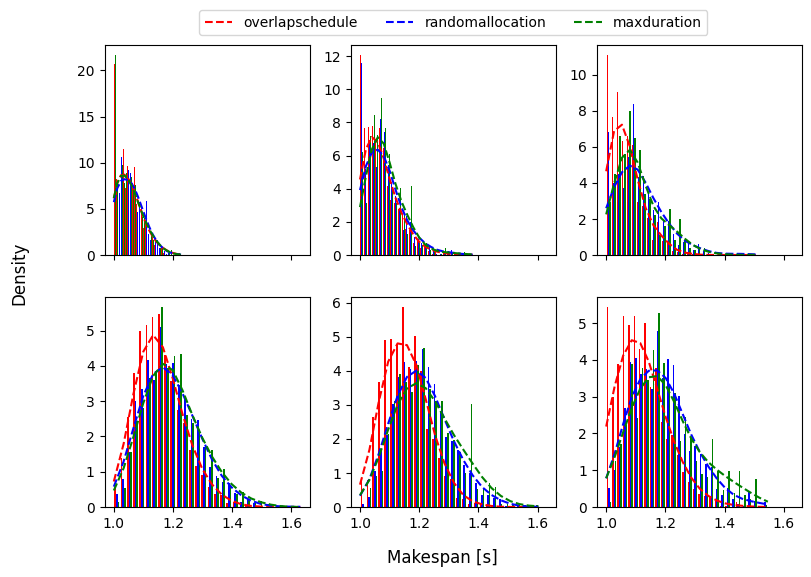

In [150]:

def set_density(ax, data, first=False):
    n_bins = 30

    color = ['red', 'blue', 'green', 'orange', 'black']

    ax.hist(data, n_bins, density=True, histtype='bar', color=color[:len(data)])
    xs = np.linspace(min(min(makespan) for makespan in data), max(max(makespan) for makespan in data), 20)

    for i, case in enumerate(data):
        density_re = gaussian_kde(case.tolist())
        density_re.covariance_factor = lambda: .50
        density_re._compute_covariance()
        ax.plot(xs, density_re(xs), "--", color=color[i])

    return ax, max(density_re(xs))

def makespan_histogram_single(df=df, save_path=experiments_path):
    fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6), sharex=True, sharey=False)
    axes = [ax0, ax1, ax2, ax3, ax4, ax5]


    legend: list[str] = []
    for case, ax in zip(cases, axes):
        makespans_other: list[list[int]] = []
        legend = []
        dist_seed = 5

        
        for dist_seed in np.unique(np.array(df["dist_seed"])):
            df_one_exp = df[df["case_number"] == case][df["dist_seed"]==dist_seed]
            ms_lb = min(df_one_exp["initial_makespan"][df["det_job"] == True][df["method_name"]=="overlapschedule"][df_one_exp["sim_seed"]==df_one_exp["schedule_seed"]])

            df["ms_norm"][df_one_exp.index] = df_one_exp["final_makespan"] / ms_lb

        for method in methods:
            legend.append(method)
            # df3 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][
            #     df["schedule_seed"] != 0][df['method_name'] == method]



            # original_makespan: list[int] = np.array(list((df3.get("makespan"))))[:, 0]
            # list_of_lists = [ast.literal_eval(l) for l in list(df3.get("makespan"))]
            makespans_other.append(np.array(list(df["ms_norm"][df["case_number"]==case][df["method_name"]==method])[:]))

            # makespans_other[-1].mean()
            # makespans_other[-1].std()
            # makespans_other[-1].max()
            # makespans_other[-1].min()


        _, ymax = set_density(ax, makespans_other)
            # ax.vlines(makespan_time_knowledge, ymin=0, ymax=ymax, color='red')


    # Set common labels
    fig.supxlabel('Makespan [s]')
    fig.supylabel('Density')
    ax1.legend(legend, ncol=3, loc='upper center',bbox_to_anchor=(0.5, 1.2))
    # fig.tight_layout()
    if save_path is not None:
        if save_path.is_file():
            fig.savefig(fname=save_path.__str__())
        elif save_path.is_dir():
            fig.savefig(save_path.joinpath("histogram_pd.png").__str__())
        else:
            raise ValueError(f"save_path has invalid type: {type(save_path)}. var: {save_path}")
    else:
        plt.show()

makespan_histogram_single(df=df)

/home/behrejan/repos/rss24_sched/scheduling/src/visualization/plot_experiments_result.py:81: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][
/home/behrejan/repos/rss24_sched/scheduling/src/visualization/plot_experiments_result.py:81: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][
/home/behrejan/repos/rss24_sched/scheduling/src/visualization/plot_experiments_result.py:81: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][
/home/behrejan/repos/rss24_sched/scheduling/src/visualization/plot_experiments_result.py:81: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][


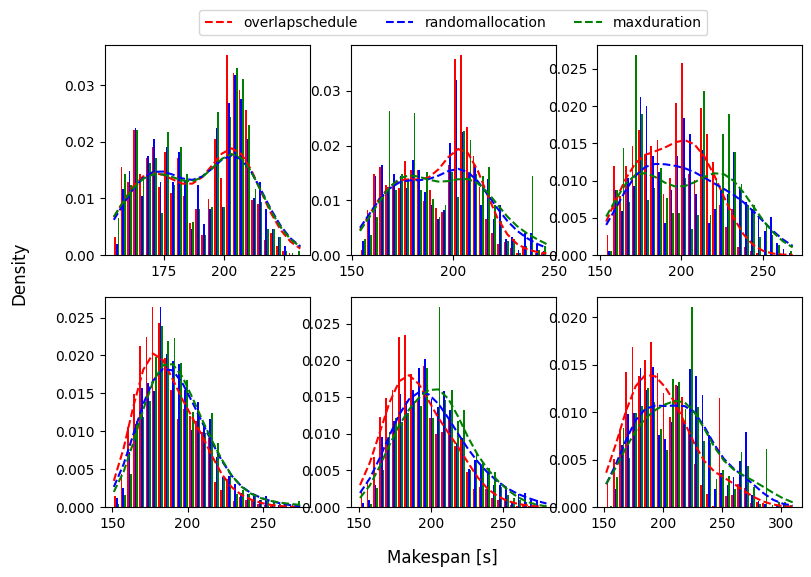

In [19]:
makespan_histogram_pd(df=df, save_path=experiments_path)

In [44]:
df["initial_makespan"] = np.array(list(df["makespan"]))[:,0]
df["final_makespan"] = np.array(list(df["makespan"]))[:,1]

In [46]:
df1[df1["initial_makespan"] != df1["final_makespan"]]

,case_number,schedule_seed,dist_seed,sim_seed,answer_seed,method_name,det_job,makespan,FAIL,initial_makespan,final_makespan
651,3,0,2,0,0,overlapschedule,True,"[163, 184]",False,163,184
1318,4,0,1,0,0,overlapschedule,True,"[167, 187]",False,167,187
6174,1,0,8,0,0,overlapschedule,True,"[172, 186]",False,172,186
10688,1,0,2,0,0,overlapschedule,True,"[163, 176]",False,163,176
11165,5,0,0,0,0,overlapschedule,True,"[179, 180]",False,179,180
11609,4,0,3,0,0,overlapschedule,True,"[152, 158]",False,152,158
16271,4,0,5,0,0,overlapschedule,True,"[167, 191]",False,167,191
16301,4,0,6,0,0,overlapschedule,True,"[154, 178]",False,154,178
16977,1,0,9,0,0,overlapschedule,True,"[154, 164]",False,154,164
18783,2,0,7,0,0,overlapschedule,True,"[197, 198]",False,197,198


In [31]:
df_det_check = df1[np.allclose(df1["makespan"][0], df1["makespan"][1])]

KeyError: 0

In [22]:
df2 = df [df["FAIL"] == False][df["case_number"] == 4][df['dist_seed'] == 0][df["sim_seed"] == 0][df['method_name'] == 'overlapschedule'][df['det_job'] == True]
df2

/tmp/ipykernel_12141/3206922475.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df [df["FAIL"] == False][df["case_number"] == 4][df['dist_seed'] == 0][df["sim_seed"] == 0][df['method_name'] == 'overlapschedule'][df['det_job'] == True]
/tmp/ipykernel_12141/3206922475.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df [df["FAIL"] == False][df["case_number"] == 4][df['dist_seed'] == 0][df["sim_seed"] == 0][df['method_name'] == 'overlapschedule'][df['det_job'] == True]
/tmp/ipykernel_12141/3206922475.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df [df["FAIL"] == False][df["case_number"] == 4][df['dist_seed'] == 0][df["sim_seed"] == 0][df['method_name'] == 'overlapschedule'][df['det_job'] == True]
/tmp/ipykernel_12141/3206922475.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df [df["FAIL"] == False][df["case_number"] == 4

,case_number,schedule_seed,dist_seed,sim_seed,answer_seed,method_name,det_job,makespan,FAIL
649,4,81,0,0,0,overlapschedule,True,"[143, 209]",False
991,4,37,0,0,0,overlapschedule,True,"[151, 213]",False
1034,4,75,0,0,0,overlapschedule,True,"[157, 186]",False
1417,4,73,0,0,0,overlapschedule,True,"[135, 240]",False
2703,4,71,0,0,0,overlapschedule,True,"[135, 206]",False
...,...,...,...,...,...,...,...,...,...
35130,4,51,0,0,0,overlapschedule,True,"[138, 185]",False
35131,4,82,0,0,0,overlapschedule,True,"[156, 204]",False
35323,4,30,0,0,0,overlapschedule,True,"[133, 223]",False
35600,4,91,0,0,0,overlapschedule,True,"[143, 211]",False


/tmp/ipykernel_12141/4203272322.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][
/tmp/ipykernel_12141/4203272322.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][
/tmp/ipykernel_12141/4203272322.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][
/tmp/ipykernel_12141/4203272322.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][
/tmp/ipykernel_12141/4203272322.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][
/tmp/ipykernel_12141/4203

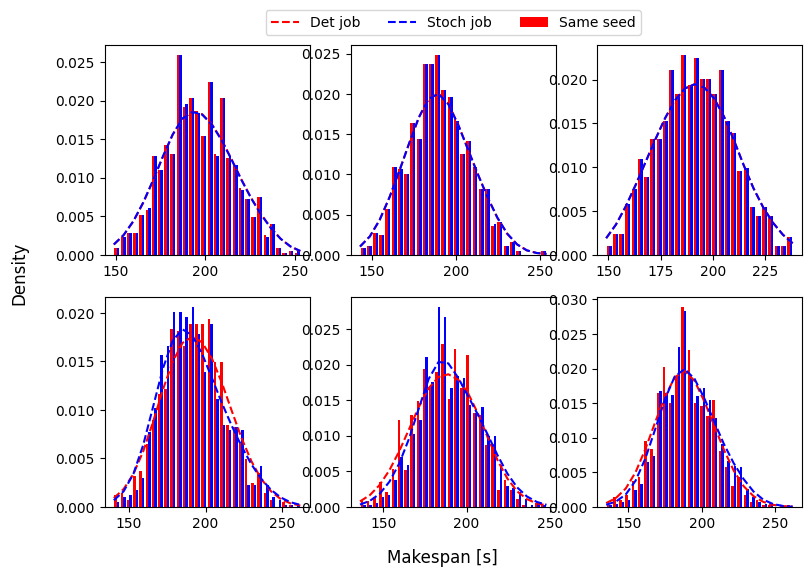

In [9]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
axes = [ax0, ax1, ax2, ax3, ax4, ax5]

for case, ax in zip(cases, axes):
    for method in methods:
        if method == 'overlapschedule':
            df1 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][
                df["schedule_seed"] == 0][df['method_name'] == method][df['dist_seed'] == 0][df['det_job'] == True]

            df2 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][
                df["schedule_seed"] != 0][df['method_name'] == method][df['det_job'] == True]

            df3 = df[df["FAIL"] == False][df["case_number"] == case][df["sim_seed"] == 0][
                df["schedule_seed"] != 0][df['method_name'] == method][df['det_job'] == False]

            # makespan_time_knowledge = df1.at[df1.index[-1], "makespan"][1]

            det_job_makespan: list[int] = np.array(list((df2.get("makespan"))))[:, 1]
            stoch_job_makespans_other: list[int] = np.array(list((df3.get("makespan"))))[:, 1]
            _, ymax = set_density(ax, [det_job_makespan, stoch_job_makespans_other])
            # ax.vlines(makespan_time_knowledge, ymin=0, ymax=ymax, color='red')
        else:
            pass
            # df2 = df[df["FAIL"] == False][df["case_number"] == case][df["dist_seed"] == 0][df['method_name'] == method]


# Set common labels
fig.supxlabel('Makespan [s]')
fig.supylabel('Density')
ax1.legend(['Det job', 'Stoch job', 'Same seed'], ncol=3, loc='upper center',bbox_to_anchor=(0.5, 1.2))
# fig.tight_layout()
plt.show()

In [ ]:
def read_data_to_df(files: list[Path], cols: dict[str, Any], ignore_missing:bool =False) -> pd.DataFrame:

    raw_data: list[dict[str, int|float|str]] = []

    for file_name in files:
        data = get_data_from_file(file_name)
        if not data:
            logging.warning(f"Could not read {file_name}.")
            continue

        exp_info = get_experiment_info(file_name.stem)

        raw_data.append(exp_info.dict())

        stats = data["statistics"]

        for col, default in cols.items():
            if col in stats:
                raw_data[-1][col] = stats[col]
            elif ignore_missing:
                pass
            else:
                raw_data[-1][col] = default
                # raise ValueError(f"{file_name} has no data about {col}.")


    df = pd.DataFrame(raw_data)

    return df

def get_data_from_file(file_name: Path):
    try:
        with open(file_name) as json_file:
            data = json.load(json_file)
    except json.decoder.JSONDecodeError as e:
        print(e)
        print(file_name)
        return None
    return data


class ExperimentInfo(BaseModel):
    case_number: int
    schedule_seed: int
    dist_seed: int
    sim_seed: int
    answer_seed: int
    method_name: str
    det_job: bool


def get_experiment_info(file_stem: str) -> ExperimentInfo:
    # sched_case_1_method_maxduration_dist_seed_0_schedule_seed_0_sim_seed_0_det_job_False_answer_seed_0

    # Use regular expression to extract the number of the case
    case_number = int(re.search(r'case_(\d+)', file_stem).group(1))
    schedule_seed = int(re.search(r'schedule_seed_(\d+)', file_stem).group(1))
    dist_seed = int(re.search(r'dist_seed_(\d+)', file_stem).group(1))
    sim_seed = int(re.search(r'sim_seed_(\d+)', file_stem).group(1))
    answer_seed = re.search(r'answer_seed_(\d+)', file_stem)
    det_job = True if file_stem.split("job")[-1].split("_")[1] == 'True' else False
    if answer_seed is None:
        answer_seed = sim_seed
    else:
        answer_seed = int(answer_seed.group(1))
    method = file_stem.split("method")[-1].split("_")[1]
    return ExperimentInfo(case_number=case_number, schedule_seed=schedule_seed, dist_seed=dist_seed, sim_seed=sim_seed,
                          answer_seed=answer_seed, method_name=method, det_job=det_job)

def set_density(ax, data, first=False):
    n_bins = 30

    color = ['red', 'blue', 'green', 'orange', 'black']

    ax.hist(data, n_bins, density=True, histtype='bar', color=color[:len(data)])
    xs = np.linspace(min(min(makespan) for makespan in data), max(max(makespan) for makespan in data), 20)

    for i, case in enumerate(data):
        density_re = gaussian_kde(case.tolist())
        density_re.covariance_factor = lambda: .50
        density_re._compute_covariance()
        ax.plot(xs, density_re(xs), "--", color=color[i])

    return ax, max(density_re(xs))